# Neural Networks

## XNOR

In [3]:
import numpy as np
from si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [4]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
from si.supervised import NN, Dense, Activation
from si.util import Sigmoid, cross_entropy, cross_entropy_prime

In [6]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [7]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [8]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True

In [9]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [10]:
nn.cost(dataset.X,dataset.y)

2.066588540474394e-09

## Train the model using backpropagation

In [11]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [19]:
nn2.fit(dataset)
nn2.is_fitted = True #forcar o fit para True

och 9272/100000, error= 0.00014741954225132954epoch 9892/100000, error= 0.00014687925828203951epoch 11157/100000, error= 0.00014578891008883906epoch 13197/100000, error= 0.0001440637516263709epoch 13841/100000, error= 0.000143527461751211epoch 14404/100000, error= 0.00014306183519251822epoch 16216/100000, error= 0.00014158321988413383epoch 16888/100000, error= 0.00014104248209079537epoch 18172/100000, error= 0.00014002051736480896epoch 19339/100000, error= 0.0001391042470838346epoch 21317/100000, error= 0.0001375779044561659epoch 22566/100000, error= 0.00013663098141551054epoch 23178/100000, error= 0.00013617166817542616epoch 24481/100000, error= 0.0001352038130603969epoch 25707/100000, error= 0.00013430544724082565epoch 26878/100000, error= 0.00013345829636920455epoch 27453/100000, error= 0.00013304615945233946epoch 28002/100000, error= 0.0001326549916079705epoch 28590/100000, error= 0.00013223854125581202epoch 29840/100000, error= 0.00013136173322758475epoch 31399/100000, error= 0.00

In [20]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

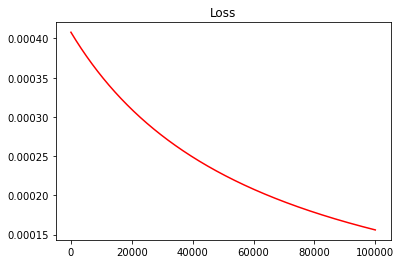

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [21]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [22]:
nn2.cost(dataset.X,dataset.y)

9.5607037500178e-05